21 : 1119.2684


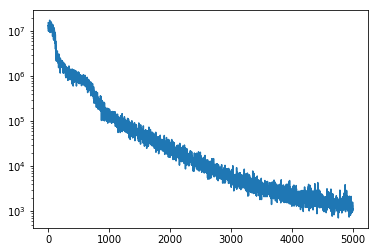

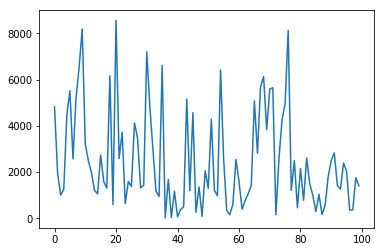

[[5202.9585]
 [ 725.2672]]
[[5244.0], [696.0]]


In [24]:
import sys
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
tf.reset_default_graph()
size=100
def gendata(size=100):
    s=np.random.randint(1111,9999,size=size)
    x=[]
    y=[]
    for i in s:
        xi=[j for j in map(float,list("{0:04d}".format(i)))]
        x.append(xi)
        y.append([(xi[0]*10+xi[1])*(xi[2]*10+xi[3])])
    #print(x[0],y[0])
    return x,y

act=tf.nn.relu
#activation=act
tf_x=tf.placeholder(tf.float32,[None,4],name='x')
tf_y=tf.placeholder(tf.float32,[None,1],name='y')
#l1 = tf.layers.dense(l1,64,tf.nn.elu)
#l1=tf.layers.Dense(x,4,tf.nn.elu)
training=tf.placeholder(tf.bool, name="isTraing")
# neural network layers
#l1 = tf.layers.dense(tf_x,30,None)
#l1 = tf.layers.batch_normalization(tf_x,training=training) # 将输入量归一化（或者叫标准化）
l1=tf.layers.dense(tf_x,64,activation=act)
#l1=tf.layers.dropout(l1,rate=0.4)
l1=tf.layers.dense(l1,64,activation=act)
#l1=tf.layers.dropout(l1,rate=0.4)
l1=tf.layers.dense(l1,64,activation=act)
#l1=tf.layers.dropout(l1,rate=0.4)
l1=tf.layers.dense(l1,64,activation=act)
o_=tf.layers.dense(l1,1)
loss=tf.losses.mean_squared_error(tf_y,o_)
#update_ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS) # 配合标准化必须的操作
#opt=tf.train.GradientDescentOptimizer(0.001).minimize(loss)
#tf.train.GradientDescentOptimizer(0.001).minimize(loss)
#with tf.control_dependencies(update_ops):
#    opt = tf.train.AdamOptimizer(0.01).minimize(loss)
opt = tf.train.AdamOptimizer(0.0005).minimize(loss)
sess=tf.Session()
sess.run(tf.global_variables_initializer())
l=[]
idx=[]
oo=[]
tick=0
import time
for i in range(5000+1):
    tx,ty=gendata()
    #print(tx.shape)
    #print(np.array(ty).dtype,np.array(ty).reshape(-1,1).shape)
    #try:
    
    _,lo,ot=sess.run([opt,loss,o_],feed_dict={tf_x:tx,tf_y:ty,training:True})
    l.append(lo)
    idx.append(i)
    oo.append(ot)
    
    if i % 250 == 0:
        tick+=1
        #print(tick," : ",lo,'\r')
        print('\r'+str(tick)+" : "+ str(lo),end='')
        #time.sleep(0.01)
    #    print(l)
    #print(l)
    #except:
    #    print("e")
print("")
plt.plot(idx,l)
#plt.ylim([0,100000])
plt.yscale('log')
plt.show()
plt.plot(ot)
plt.show()
tst_x,tst_y=gendata(size=2)
print(sess.run(o_,feed_dict={tf_x:tst_x}))
print(tst_y)



#TrainX=[x for x in map(int,list(str(np.random.randint(1,9999,size=100))))]
#TrainY=(TrainX[0]*10+TrainX[1])*(TrainX[2]*10+TrainX[3])
#print(done)